In [1]:
from Packages.UpdateManager import UpdateManager
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
def Gaussian(x, sigma, mu = 0):
    return np.sqrt(1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2)))

def FTGaussian(k,sigma):
    return np.sqrt(4*np.pi*sigma**2)/((2*sigma**2*np.pi)**(1/4))*np.exp(-4*(sigma*np.pi*k)**2)

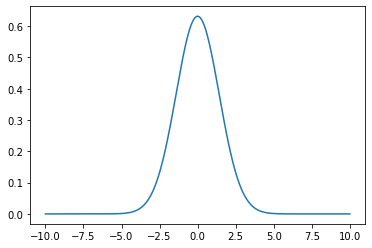

In [4]:
x = np.linspace(-10,10,1000)
%matplotlib inline
fig, ax = plt.subplots()
plt.plot(x, Gaussian(x,1,0))

In [5]:
dx = x[1]-x[0]
Norm = np.sum(dx*(Gaussian(x,1,0)**2))
print(Norm)

1.0


In [6]:
FFTGaussian = 20*np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(Gaussian(x,1,0)))) #Here is how to use numpys fft correctly
dW = 1/(20)
N = len(x)
w = np.linspace(-N/2,N/2-1,N)*dW

C:\Users\Kingdel\.conda\envs\IRPointLock\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


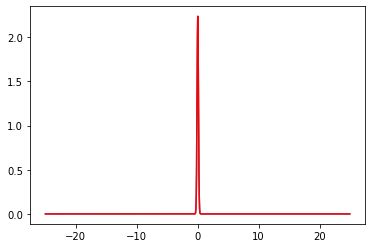

In [7]:
plt.plot(w,FFTGaussian)
plt.plot(w,FTGaussian(w,1),'r')

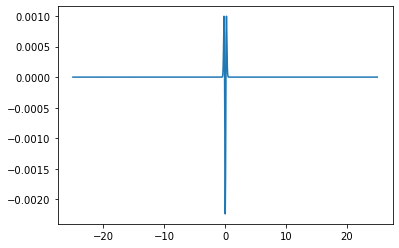

In [8]:
plt.plot(w,(np.abs(FFTGaussian)-FTGaussian(w,1)))

In [9]:
print(np.sum(dW*np.abs(FFTGaussian)**2))

0.9990000000000003


In [10]:
print(np.sum(dW*FTGaussian(w,1)**2))

0.9999999999999998


Now to make the NonUniform FFT work correctly:

In [11]:
import nfft

In [12]:
FFTGaussian = 20*np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(Gaussian(x,1,0)))) #Here is how to use numpys fft correctly

NUFFTGaussian = nfft.nfft_adjoint(x/20, Gaussian(x,1,0), len(x))*20/len(x) # And here is how to use the NuFFT. 

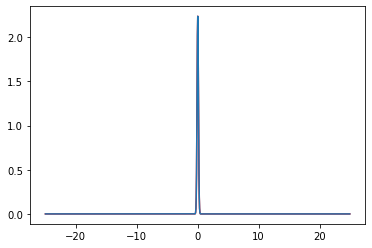

In [13]:
fig, ax = plt.subplots()
plt.plot(w,np.abs(FFTGaussian),'r')
plt.plot(w,np.abs(NUFFTGaussian))

In [14]:
np.sum(dW*np.abs(NUFFTGaussian)**2)

0.9980009999971576

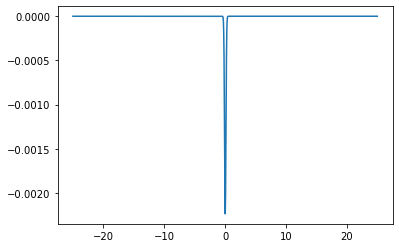

In [15]:
plt.plot(w,np.abs(NUFFTGaussian)-FTGaussian(w,1))

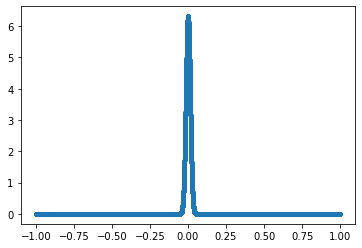

In [16]:
x = np.sort(np.random.uniform(-1,1,100000))
plt.plot(x,Gaussian(x,0.01,0),".")

In [17]:
NUFFTGaussian = nfft.nfft_adjoint(x/(x[-1]-x[0]), Gaussian(x,0.01,0), len(x))*(x[-1]-x[0])/len(x) # And here is how to use the NuFFT. 

In [18]:
dW = 1/(x[-1]-x[0])
N = len(x)
w = np.linspace(-N/2,N/2-1,N)*dW

C:\Users\Kingdel\.conda\envs\IRPointLock\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


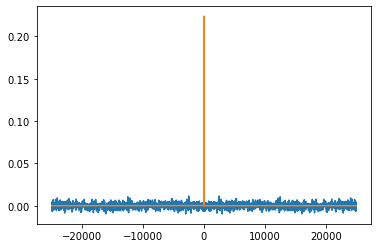

In [19]:
plt.plot(w, NUFFTGaussian)
plt.plot(w,FTGaussian(w,0.01))

C:\Users\Kingdel\.conda\envs\IRPointLock\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


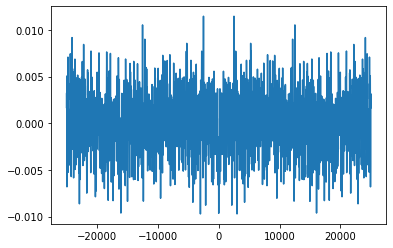

In [20]:
plt.plot(w,NUFFTGaussian-FTGaussian(w,0.01))

In [21]:
print(np.trapz(np.abs(NUFFTGaussian)**2,w))

1.8071455692280876
